模块4：数据可视化和数据结构
1. 简介
Pandas是一个强大的数据处理库，它对于Python数据分析的意义是十分重大的，各种图像生成十分方便，并且支持各种数据存储文件、数据库、甚至Web中读取数据在 Pandas 中，数据可视化通常是通过将 Pandas 数据结构与 Matplotlib、Seaborn 或其他数据可视化库结合使用来实现的。

方法一.plot()
Pandas 内置的可视化功能，提供了简单易用的数据可视化功能，可以帮助用户快速生成各种类型的图表。 
Plot 模块的功能包括图表标题、坐标轴标签、图例、颜色、线型等。同时它是基于Matplotlib 库构建的，因此用户可以通过 plot 方法生成的图表对象进一步进行 Matplotlib 的定制化操作，实现更高级的定制和可视化效果。总结Plot有以下几个功能特点：多种图表类型，简单方便，支持自定义，数据处理和可视化一体化。
df.plot(x, y, kind, figsize, title, grid, legend, style...)
x 横坐标变量
y 纵坐标变量（于Series类型数据来说其索引就是x轴，y轴则是具体的值；对于Dataframe类型数据来说，其索引同样是x轴的值，y轴默认为全部，不过可以进行指定选择。）
kind 可视化图的种类，如line,hist, bar, barh, pie, kde, scatter
figsize 画布尺寸
title 标题
grid 是否显示格子线条
legend 是否显示图例
style 图的风格
xlabel 指定 x 轴的标签
ylabel 指定 y 轴的标签
color 指定图表的颜色
alpha 指定图表元素的透明度...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

（1）.直方图

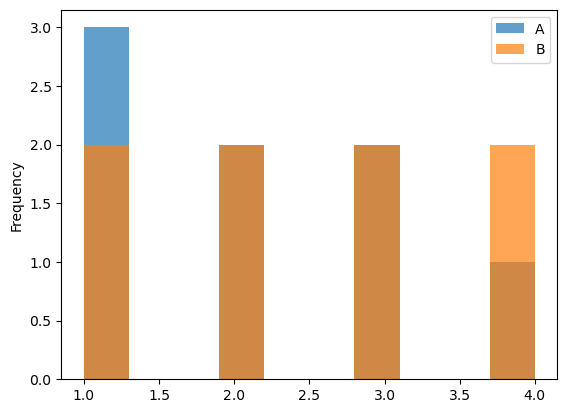

In [49]:
df = pd.DataFrame({
    'A': [1, 2, 1, 3, 3, 2, 4, 1],
    'B': [4, 3, 2, 1, 4, 3, 2, 1]
})
df.plot(kind='hist', alpha=0.7)
plt.show()

（2）.折线图

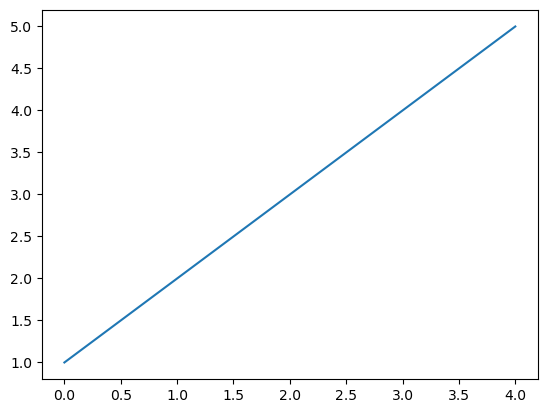

In [46]:
data = pd.Series([1, 2, 3, 4, 5])
data.plot(kind='line')
plt.show()

（3）.条形图

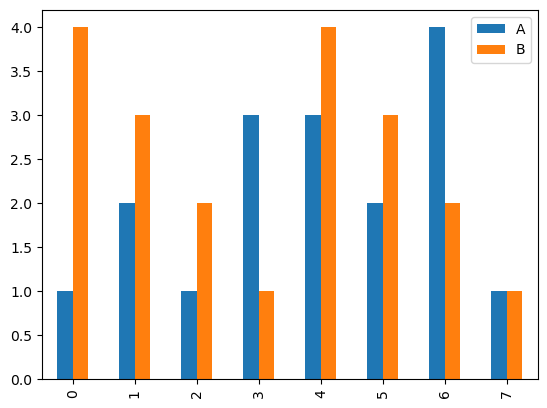

In [50]:
df.plot.bar()
plt.show()

多组

<Axes: >

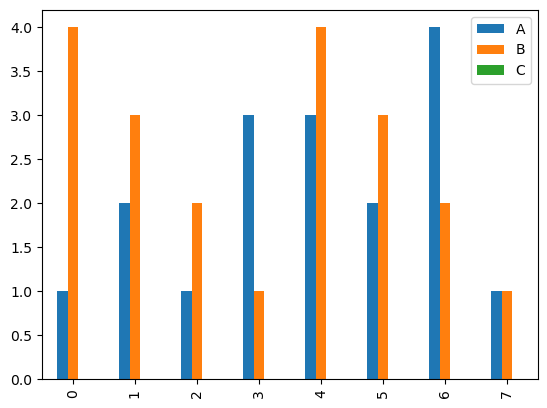

In [12]:
df = pd.DataFrame({
    'A': [1, 2, 1, 3, 3, 2, 4, 1],
    'B': [4, 3, 2, 1, 4, 3, 2, 1]
}, columns=list('ABC'))
df.plot.bar()

堆积

<Axes: >

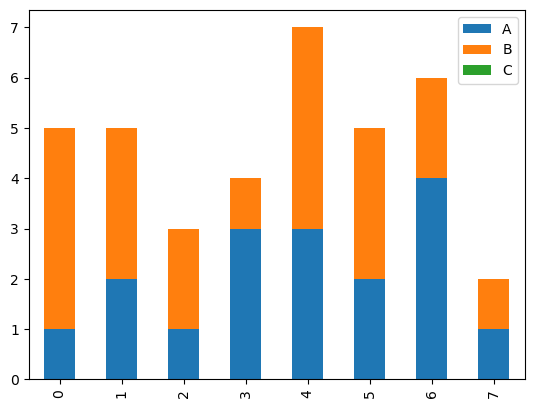

In [13]:
df.plot.bar(stacked=True)

水平堆积

<Axes: >

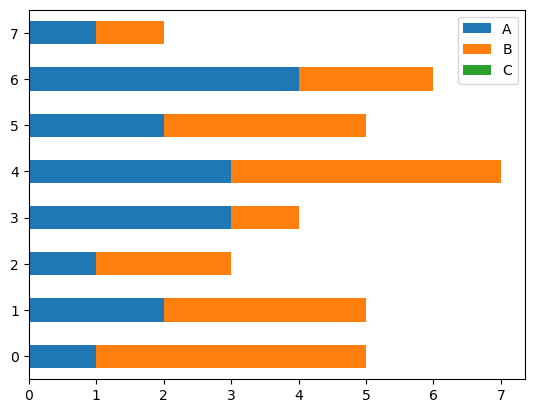

In [14]:
df.plot.barh(stacked=True)

（4）.散点图

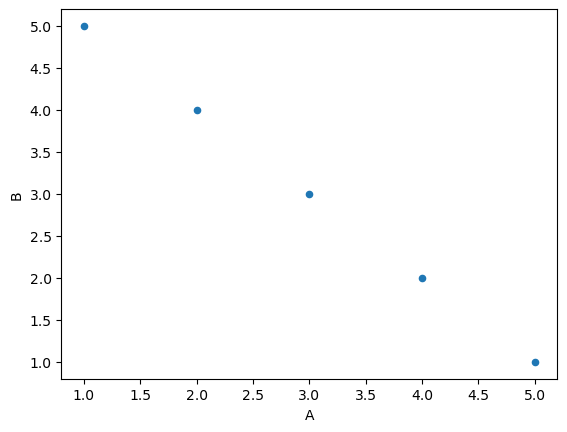

In [7]:
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
})
data.plot(kind='scatter', x='A', y='B')
plt.show()

（5）.箱型图

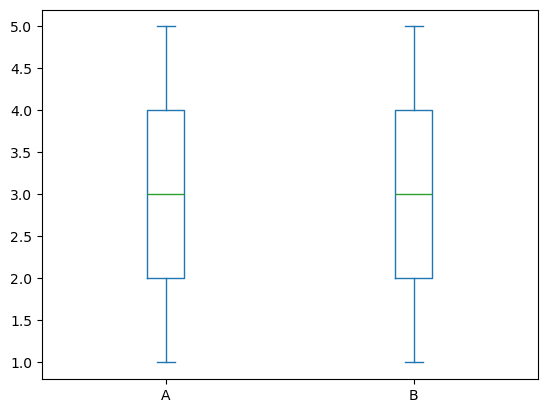

In [8]:
data.plot(kind='box')
plt.show()

（6）.饼形图

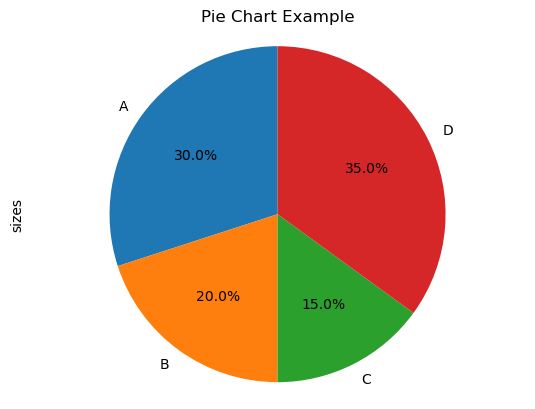

In [3]:
data = {'sizes': [30, 20, 15, 35],
        'labels': ['A', 'B', 'C', 'D']}
df = pd.DataFrame(data)
fig, ax = plt.subplots()
df.plot(kind='pie', y='sizes', labels=df['labels'], autopct='%1.1f%%', startangle=90, ax=ax, legend=False)
ax.set_title('Pie Chart Example')
plt.axis('equal')
plt.show()

（7）.六边形分箱图

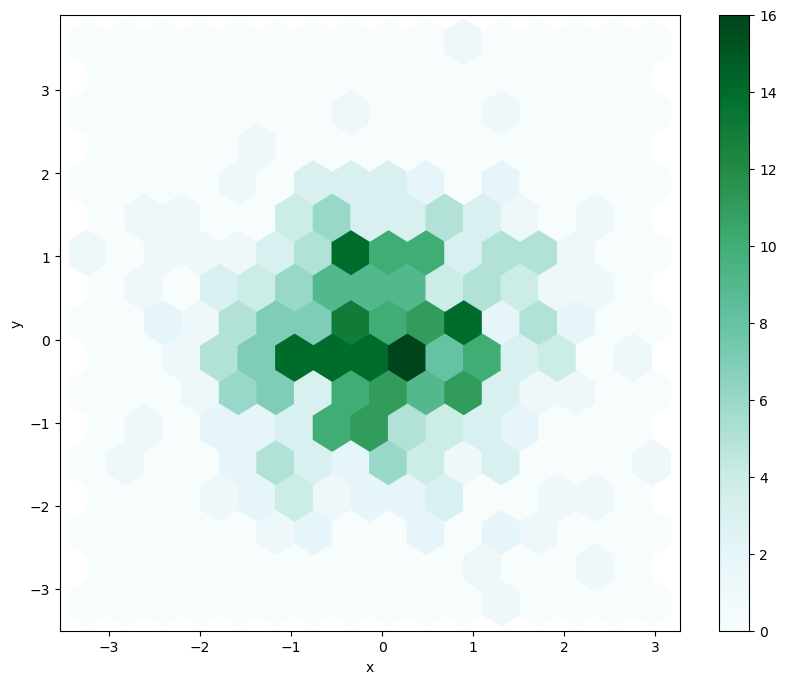

In [13]:
np.random.seed(123)
df = pd.DataFrame({'x': np.random.randn(500),
                   'y': np.random.randn(500)})
ax = df.plot(kind='hexbin', x='x', y='y', gridsize=15, figsize=(10, 8))

（8）.面积图

<Axes: >

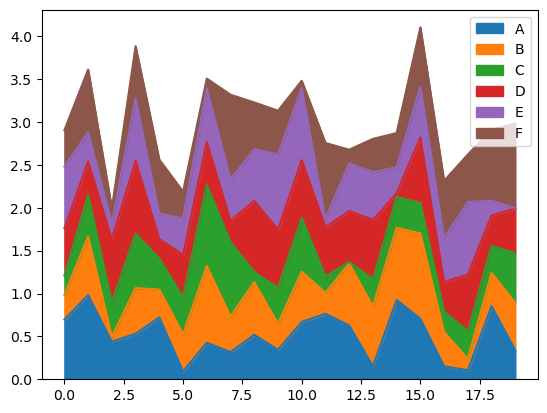

In [14]:
np.random.seed(123)
df = pd.DataFrame(np.random.rand(20, 6), columns=list('ABCDEF'))
df.plot(kind='area')

方法二.subplot（）多图并存
fig, axs = plt.subplots(N))
或df.plot(subplots=True, layout=(N, N))

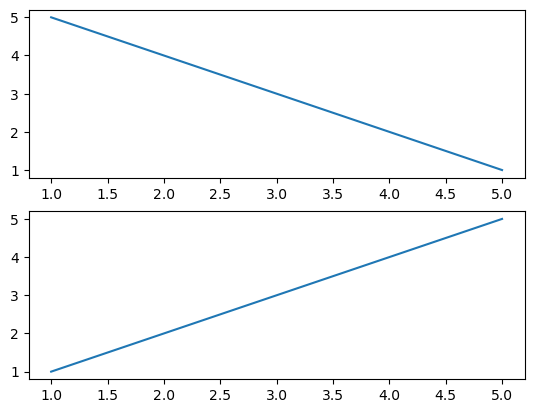

In [15]:
x = [1, 2, 3, 4, 5]
y1 = [5, 4, 3, 2, 1]
y2 = [1, 2, 3, 4, 5]
fig, axs = plt.subplots(2)

axs[0].plot(x, y1)

axs[1].plot(x, y2)

plt.show()

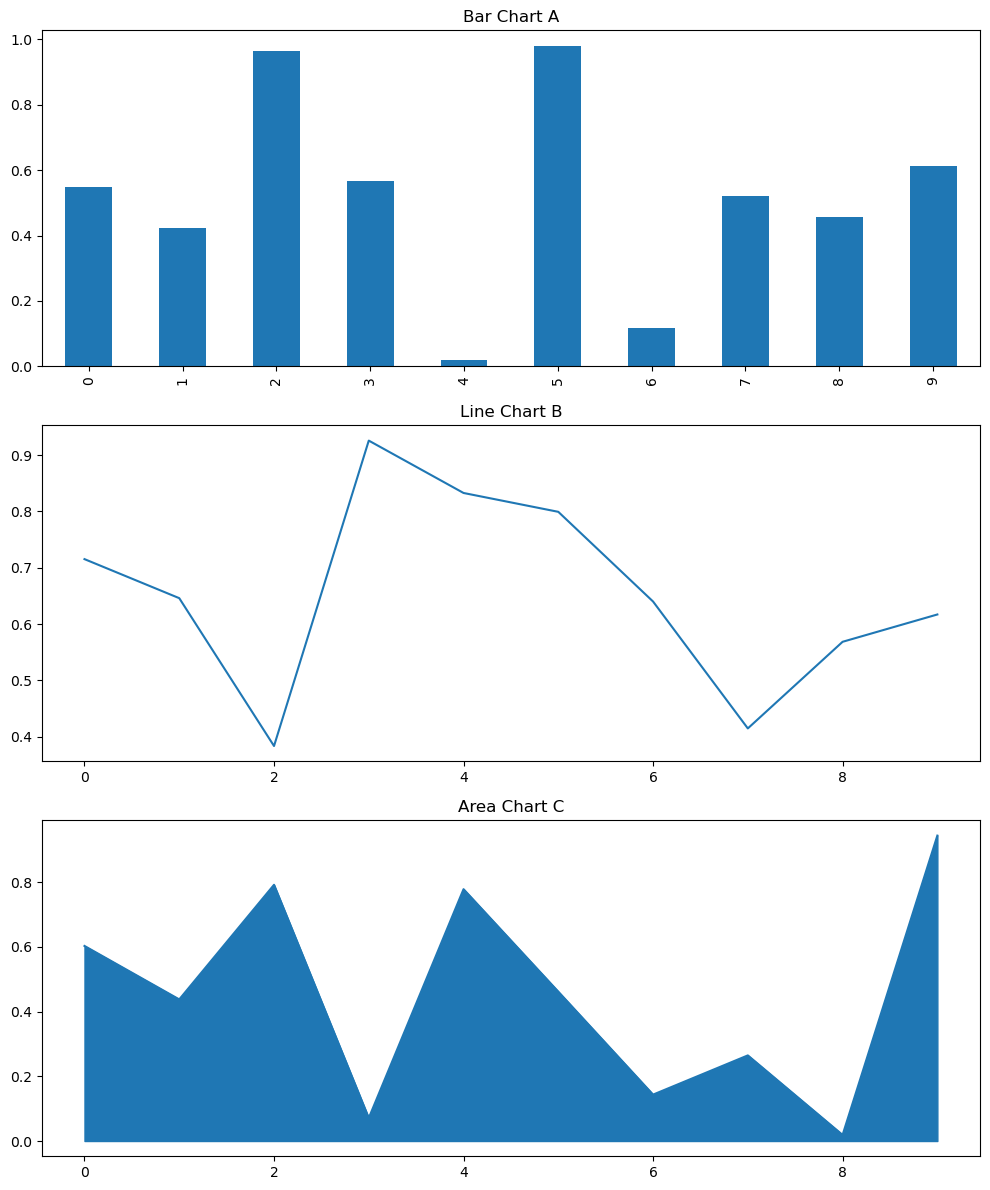

In [39]:
np.random.seed(0)
data = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])

# 创建一个包含多个子图的画布
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

data['A'].plot(kind='bar', ax=axs[0], title='Bar Chart A')

data['B'].plot(kind='line', ax=axs[1], title='Line Chart B')

data['C'].plot(kind='area', ax=axs[2], title='Area Chart C')

plt.tight_layout()

plt.show()

In [ ]:
并列显示子图

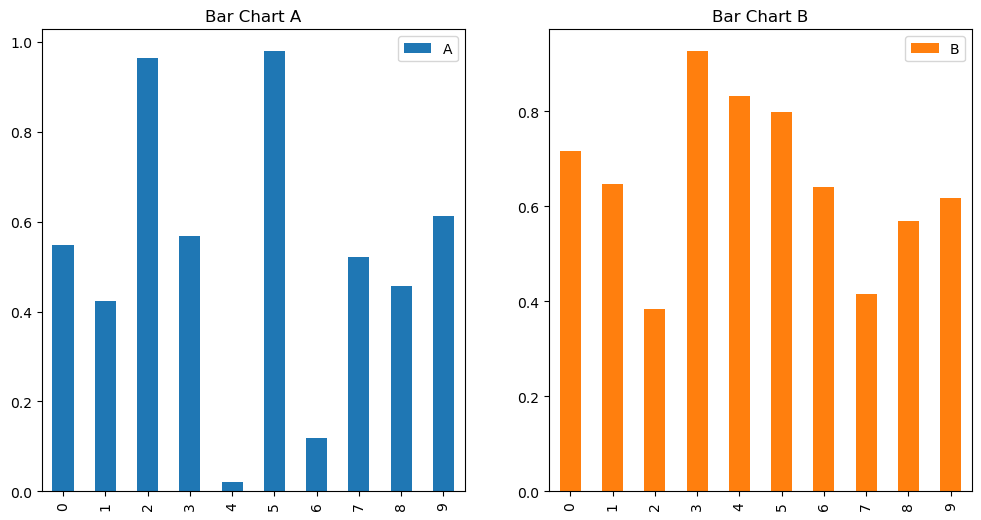

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# 在不同的子图中绘制不同列的数据
data['A'].plot(kind='bar', ax=axs[0, 0], title='Bar Chart A')
data['B'].plot(kind='line', ax=axs[0, 1], title='Line Chart B')
data['C'].plot(kind='area', ax=axs[1, 0], stacked=False, title='Area Chart C')
data['D'].plot(kind='scatter', ax=axs[1, 1], x='D', y='A', title='Scatter Plot D vs A')

plt.tight_layout()
plt.show()

共享轴

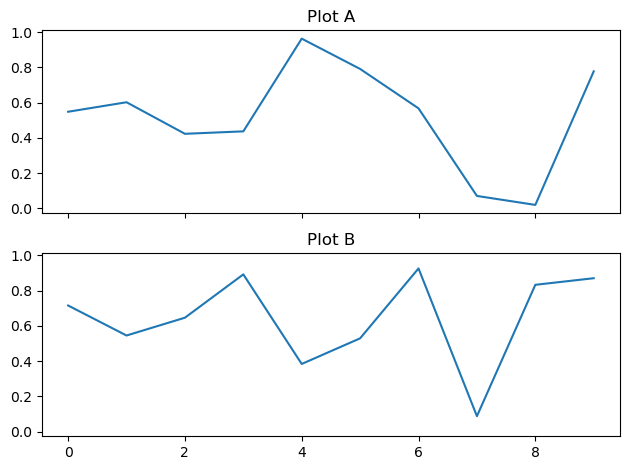

In [41]:
np.random.seed(0)
data = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

# 创建一个包含两个子图的画布，并共享x轴和y轴
fig, axs = plt.subplots(2, sharex=True, sharey=True)

data['A'].plot(ax=axs[0], title='Plot A')
data['B'].plot(ax=axs[1], title='Plot B')

plt.tight_layout()
plt.show()

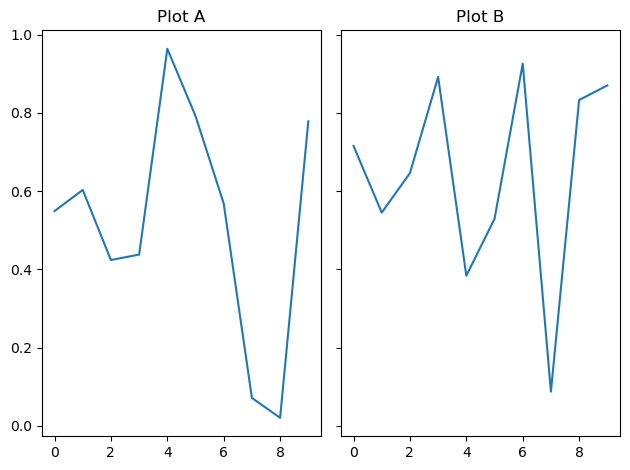

In [43]:
# 创建示例数据
np.random.seed(0)
data = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

data['A'].plot(ax=axs[0], title='Plot A')
data['B'].plot(ax=axs[1], title='Plot B')

plt.tight_layout()
plt.show()

方法三Series（）
pandas库的名字来源于3种主要数据结构开头字母的缩写：Panel，Dataframe，Series。其中Series表示一维数据，Dataframe表示二维数据，Panel表示三维数据，可见在Pandas库中最核心的就是他的数据结构。
Series是带有标签的一维数组，可以保存任何数据类型（整数，字符串，浮点数，Python对象等），轴标签统称为索引（index）。
pandas.Series( data, index, dtype, copy)

（1）创建Series，基于NumPy的N维数组构建的，内部的数据需要统一。Series增加对应的label作为索引，如果没有添加索引，Python会自动添加一个0到n-1的索引值，索引在左，数值在右边

In [55]:
s = pd.Series([1, 2, 5, 3, 2])
print(s)

0    1
1    2
2    5
3    3
4    2
dtype: int64


In [64]:
data = {'A': 10, 'B': 20, 'C': 30, 'D': 40, 'E': 50}
s1 = pd.Series(data)
print(s1)

A    10
B    20
C    30
D    40
E    50
dtype: int64


In [65]:
data = [10, 20, 30, 40, 50]
labels = ['A', 'B', 'C', 'D', 'E']
s2 = pd.Series(data, index=labels)

print(s2)

A    10
B    20
C    30
D    40
E    50
dtype: int64


（2）访问Series

In [58]:
print(s[0])  # 访问第一个元素的值
print(s[:3])  # 访问前三个元素

1
1
0    1
1    2
2    5
dtype: int64


（3）统计
.describe
count 数据个数
mean 均值
std	均方差
min	最小值
max	最大值
25%	前25%的数据分位数
50%	前50%的数据分位数
75%	前75%的数据分位数

In [54]:
print(s.describe())

count    5.000000
mean     2.600000
std      1.516575
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      5.000000
dtype: float64


In [59]:
print(s.mean())  # 计算平均值
print(s.max())   # 找到最大值
print(s.min())   # 找到最小值

2.6
5
1


（4）筛选数据

In [61]:
print(s[s < 3])  

0    1
1    2
4    2
dtype: int64


（5）排序

In [62]:
s_sorted = s.sort_values(ascending=False)  # 降序排序
print(s_sorted)

2    5
3    3
1    2
4    2
0    1
dtype: int64


方法四DataFrame（）
DataFrame是带有标签的二维数据结构，由若干个Series构成，具有index（行标签）和columns（列标签）。如果传递index或columns，则会用于生成的DataFrame的index或columns。

（1）创建
pandas.DataFrame( data, index, columns, dtype, copy)

In [71]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}
df2 = pd.DataFrame(data)
print(df2)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [69]:
df0 = pd.DataFrame(data,columns=['one','two','three'],index=['a','b','c'])
print(df0)

   one  two three
a  NaN  NaN   NaN
b  NaN  NaN   NaN
c  NaN  NaN   NaN


（2）访问

In [72]:
print(df2['Name'])  # 获取 'Name' 列的数据
print(df2.iloc[0])  # 获取第一行的数据

0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object
Name       Alice
Age           25
City    New York
Name: 0, dtype: object


（3）统计
.describe
count 数据个数
mean 均值
std	均方差
min	最小值
max	最大值
25%	前25%的数据分位数
50%	前50%的数据分位数
75%	前75%的数据分位数

In [73]:
print(df2.describe())

             Age
count   4.000000
mean   32.500000
std     6.454972
min    25.000000
25%    28.750000
50%    32.500000
75%    36.250000
max    40.000000


（4）筛选

In [74]:
print(df2[df2['Age'] > 30])  # 选择年龄大于30的行

      Name  Age     City
2  Charlie   35  Chicago
3    David   40  Houston


（5）排序

In [75]:
df2_sorted = df2.sort_values(by='Age', ascending=False) 
print(df2_sorted)

      Name  Age         City
3    David   40      Houston
2  Charlie   35      Chicago
1      Bob   30  Los Angeles
0    Alice   25     New York


方法五 MultiIndex（）
当数据高于二维时，一般却不用 Panel 表示，一般用包含多层级索引的Dataframe进行表示，MultiIndex 是一种用于在单个轴上具有多个层级索引的数据结构
一般用于使用第二个索引列作为第一个索引列的补充，以唯一地标识每行，或者用于表示多维。展示数据更加直观，操作数据更加灵活，并且可以表示3维，4维乃至任意维度的数据。

（1）创建

In [76]:
import pandas as pd
# 创建带有 MultiIndex 的 DataFrame
arrays = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]]
index = pd.MultiIndex.from_arrays(arrays, names=('Index1', 'Index2'))
df3 = pd.DataFrame({'Values': [10, 20, 30, 40]}, index=index)

print(df3)

               Values
Index1 Index2        
A      1           10
       2           20
B      1           30
       2           40


（2）访问

In [78]:
print(df3.loc['A'])  # 获取 'A' 索引的数据
print(df3.loc[('A', 1)])  # 获取 ('A', 1) 的数据

        Values
Index2        
1           10
2           20
Values    10
Name: (A, 1), dtype: int64


（3）交换索引级别

In [79]:
df3_swapped = df3.swaplevel('Index1', 'Index2')
print(df3_swapped)

               Values
Index2 Index1        
1      A           10
2      A           20
1      B           30
2      B           40


（4）分组和聚合

In [80]:
grouped = df3.groupby('Index1').sum()
print(grouped)

        Values
Index1        
A           30
B           70


（5）重塑数据

In [81]:
# 重塑数据
reshaped = df3.unstack()
print(reshaped)

# 将重塑的数据逆转
unreshaped = reshaped.stack()
print(unreshaped)

       Values    
Index2      1   2
Index1           
A          10  20
B          30  40
               Values
Index1 Index2        
A      1           10
       2           20
B      1           30
       2           40


（6）索引切片

In [82]:
print(df3.loc[('A', 1):('B', 1)])

               Values
Index1 Index2        
A      1           10
       2           20
B      1           30


（7）重命名索引级别

In [83]:
df3_renamed = df3.rename_axis(index={'Index1': 'Category'})
print(df3_renamed)

                 Values
Category Index2        
A        1           10
         2           20
B        1           30
         2           40
